<a href="https://colab.research.google.com/github/zahrabashir98/Digit-Recognition-from-Sound/blob/master/fsdd(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Amirhosein Kazemnejad, Iran University of Science and Technology

# Digit Recognition from Sound
Given an audio, the task is to recognize the digit.

**Dataset specs:**
- 3 speakers
- 1,500 recordings (50 of each digit per speaker)
- English pronunciations

We split the data as 90% train - 10% test.

## Download dataset

To download the dataset, we simply need to clone git repository from [Free Spoken Digit Dataset (FSDD)](https://github.com/Jakobovski/free-spoken-digit-dataset)

In [0]:
!git clone https://github.com/Jakobovski/free-spoken-digit-dataset.git

Cloning into 'free-spoken-digit-dataset'...
remote: Enumerating objects: 2598, done.
remote: Total 2598 (delta 0), reused 0 (delta 0), pack-reused 2598
Receiving objects: 100% (2598/2598), 21.76 MiB | 7.46 MiB/s, done.
Resolving deltas: 100% (43/43), done.



First let's import some prerequisites:

In [0]:
import librosa
import librosa.display
import os
import scipy
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
plt.rcParams['figure.figsize'] = (7,9) # Make the figures a bit bigger

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils, to_categorical

from sklearn.model_selection import train_test_split

Using TensorFlow backend.


First Let explore dataset a liitle bit:

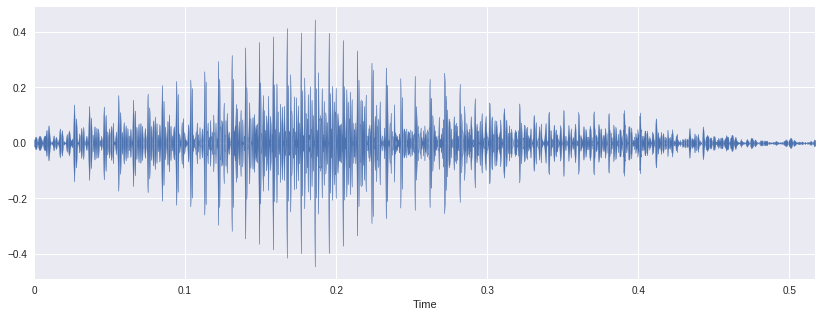

In [0]:
%matplotlib inline

plt.figure(figsize=(14, 5))
x, sr = librosa.load('free-spoken-digit-dataset/recordings/1_jackson_0.wav')
# plot wave form
librosa.display.waveplot(x, sr=sr)

# Play audio
Audio(x, rate=sr)

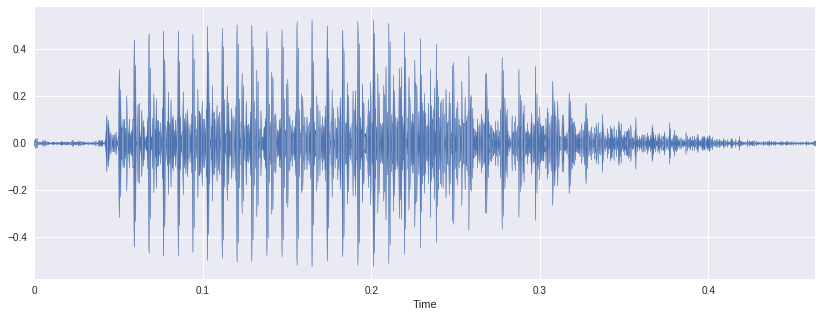

In [0]:
%matplotlib inline

plt.figure(figsize=(14, 5))
x, sr = librosa.load('free-spoken-digit-dataset/recordings/4_jackson_0.wav')
# plot wave form
librosa.display.waveplot(x, sr=sr)

# Play audio
Audio(x, rate=sr)

## Data Preprocessing

- Read .wav files
- Extract features using mfcc (checkout [Wikipedia](https://en.wikipedia.org/wiki/Mel-frequency_cepstrum) for more information)
- Normalize
- Create dataset files

In [0]:
def wav2mfcc(file_path, max_pad_len=20):
  wave, sr = librosa.load(file_path, mono=True, sr=None)
  wave = wave[::3]
  mfcc = librosa.feature.mfcc(wave, sr=8000)
  pad_width = max_pad_len - mfcc.shape[1]
  mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
  return mfcc

def get_data():
  labels = []
  mfccs = []

  for f in os.listdir('free-spoken-digit-dataset/recordings'):
    if f.endswith('.wav'):
      # MFCC
      mfccs.append(wav2mfcc('free-spoken-digit-dataset/recordings/' + f))

      # List of labels
      label = f.split('_')[0]
      labels.append(label)

  mfccs = np.asarray(mfccs)
  dim_1 = mfccs.shape[1]
  dim_2 = mfccs.shape[2]
  mfccs = mfccs.reshape((mfccs.shape[0], dim_1 * dim_2))

  return mfccs, to_categorical(labels)

def get_fsdd_dataset():
  mfccs, labels = get_data()

  channels = 1
  classes = 10

  X = mfccs
  X = librosa.util.normalize(X)
  y = labels

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
  return X_train, X_test, y_train, y_test

Loading the dataset:

In [0]:
x_train, x_test, y_train, y_test = get_fsdd_dataset()
input_shape = x_train.shape[1]

print("Num of train samples:", x_train.shape[0])
print("Num of test samples:", x_test.shape[0])
print("Num of input features:", input_shape)

Num of train samples: 1350
Num of test samples: 150
Num of input features: 400


## Model Definition

Function to create model object

In [0]:
def build_model(input_shape):
  
  model = Sequential()
  model.add(Dense(256, activation='relu', input_shape=(input_shape,)))
  model.add(Dense(256, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['acc'])

  return model
  """
  Dence
  Paramaters:
    input_shape:
      num of input features/ input size
      
  Returns:
    model:
      instance of keras.model
  """

In [0]:
def train_model(model, x, y, num_epochs=20, bs=128, val_data=None):

    history = model.fit(x, y, epochs=num_epochs,batch_size=bs, validation_data=val_data)

    """
    Parameters:
      model: an instance of keras.model

      x: x_train
      y: y_train

      num_epochs: iterate throght dataset for # of times
      bs: batch size

      val_data: tuple of (x_val, y_val)
    """

In [0]:
def evaluate_model(model, x_test, y_test):
  
  loss, acc = model.evaluate(x_test, y_test)
  return acc
  """
  Parameters:
    model: an instance of keras.model
    x_test: test split
    y_test: test split labels
    
  Returns:
    accuracy
  """

In [0]:
# Create model Graph
model = build_model(input_shape)

# train Model
history = train_model(model, x_train, y_train, val_data=(x_test, y_test))

# Evaluate Model
test_acc = evaluate_model(model, x_test, y_test)
print("Accuracy:", test_acc)

Train on 1350 samples, validate on 150 samples
Epoch 1/20
1350/1350 [==============================] - 2s 2ms/step - loss: 1.9770 - acc: 0.4778 - val_loss: 1.5431 - val_acc: 0.6533
Epoch 2/20
1350/1350 [==============================] - 0s 46us/step - loss: 1.2610 - acc: 0.7393 - val_loss: 1.0766 - val_acc: 0.6467
Epoch 3/20
1350/1350 [==============================] - 0s 48us/step - loss: 0.8781 - acc: 0.7889 - val_loss: 0.7616 - val_acc: 0.7933
Epoch 4/20
1350/1350 [==============================] - 0s 47us/step - loss: 0.6687 - acc: 0.8437 - val_loss: 0.6327 - val_acc: 0.8333
Epoch 5/20
1350/1350 [==============================] - 0s 45us/step - loss: 0.5452 - acc: 0.8667 - val_loss: 0.5902 - val_acc: 0.8133
Epoch 6/20
1350/1350 [==============================] - 0s 46us/step - loss: 0.4689 - acc: 0.8837 - val_loss: 0.5245 - val_acc: 0.8400
Epoch 7/20
1350/1350 [==============================] - 0s 42us/step - loss: 0.3995 - acc: 0.8970 - val_loss: 0.4414 - val_acc: 0.8733
Epoch 8/2

## Ploting loss

In [0]:
%matplotlib inline

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

NameError: ignored

## Further experiments:
- Try using better network architecture.
- Try using layers with more hidden units or fewer hidden units.
- Try using dropout